In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [488]:
# load preprocessed train dataset
df_train = pd.read_csv('titanic_train_preprocessed2.csv')

# create matrix of the features (X) and target (y)
X = df_train.drop('Survived',axis=1) # values used for prediction
y = df_train['Survived'] # values to be predicted

# split data from "titanic_train_preprocessed.csv" to training data (75%) and testing data (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [498]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 2, 3, 5, 7, 10], "min_samples_split" : [2, 4, 7, 10, 12, 16, 18, 22, 28, 36, 45], "n_estimators": [10, 25, 50, 100, 200]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 5, 7, 10],
                         'min_samples_split': [2, 4, 7, 10, 12, 16, 18, 22, 28,
                                               36, 45],
                         'n_estimators': [10, 25, 50, 100, 200]})

In [502]:
clf.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=22,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=1)

In [503]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 22,
 'n_estimators': 10}

In [504]:
clf.best_score_

0.8443160139153856

In [505]:
# Create a random forest classifier
rfc = RandomForestClassifier(criterion='gini', n_estimators=10, max_depth=None, min_samples_split=16, min_samples_leaf=1,
                                       max_features='sqrt', oob_score=True, random_state=1, n_jobs=-1, verbose=1)

# fit classifier to the training data
rfc.fit(X_train.values,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(min_samples_split=16, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=1, verbose=1)

In [506]:
# Make predictions on the test set
y_pred = rfc.predict(X_test.values)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [507]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.852017937219731


In [508]:
# once happy with the model accuracy, fit it on all data
rfc.fit(X.values,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(min_samples_split=16, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=1, verbose=1)

In [509]:
X_pred = pd.read_csv('titanic_test_preprocessed2.csv')
X_pred.replace([np.inf, -np.inf], np.nan, inplace=True) # becaouse of error NaN/inf
X_pred.fillna(999, inplace=True) # becaouse of error NaN/inf
X_pred.head()

,Age,SibSp,Parch,Fare,Relatives,Age_Class,Female,Male,Master,Miss,Mr,Mrs,Class 1,Class 2,Class 3,EmbarkC,EmbarkQ,EmbarkS
0,0.452723,0.000,0.000000,0.015282,0.0,0.569037,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.617566,0.125,0.000000,0.013663,0.1,0.776231,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.815377,0.000,0.000000,0.018909,0.0,0.682303,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.353818,0.000,0.000000,0.016908,0.0,0.444721,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.287881,0.125,0.111111,0.023984,0.2,0.361843,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [510]:
X_pred_convert = np.nan_to_num(X_pred) # conversion, otherwise y_pred throws an error

In [511]:
# and do prediction with all data available
y_pred = rfc.predict(X_pred_convert)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [512]:
# convert numpy ndarray back to dataframe
predicted_data = pd.DataFrame(y_pred)

# append the predicted data to final file
df_test = pd.read_csv('titanic_test_data.csv')
df_test = pd.concat([df_test,predicted_data],axis=1) # append predicted y
df_test = df_test.rename(columns = {0:'Survived'}) # rename added column
df_test = df_test[['PassengerId', 'Survived']] # leave only requested columns for submit
df_test.head() # check if correct

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [513]:
# save result
df_test.to_csv('submission.csv', index=False)

In [514]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73333333 0.82022472 0.75280899 0.84269663 0.85393258 0.86516854
 0.79775281 0.75280899 0.83146067 0.86516854]
Mean: 0.8115355805243445
Standard Deviation: 0.047113901688960416


In [515]:
# check relevance of features
rfc.fit(X.values,y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.196
Age_Class,0.146
Mr,0.140
Age,0.123
Male,0.081
Female,0.064
Relatives,0.049
Class 3,0.045
SibSp,0.034


<Axes: xlabel='feature'>

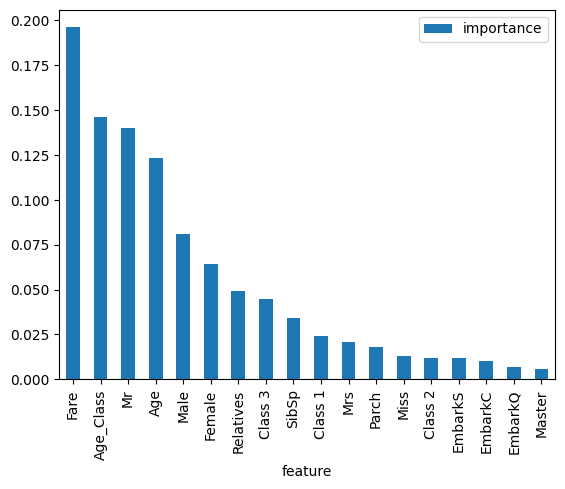

In [516]:
importances.plot.bar()

In [525]:
# Random Forest
rfc = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 16,   
                                       n_estimators=50, 
                                       max_features='sqrt', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rfc.fit(X_train, y_train)
Y_prediction = rfc.predict(X_test)

rfc.score(X_train, y_train)

print("oob score:", round(rfc.oob_score_, 4)*100, "%")

oob score: 82.93 %


In [526]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[377,  38],
       [ 75, 178]], dtype=int64)

In [527]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8240740740740741
Recall: 0.7035573122529645


In [528]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7590618336886994

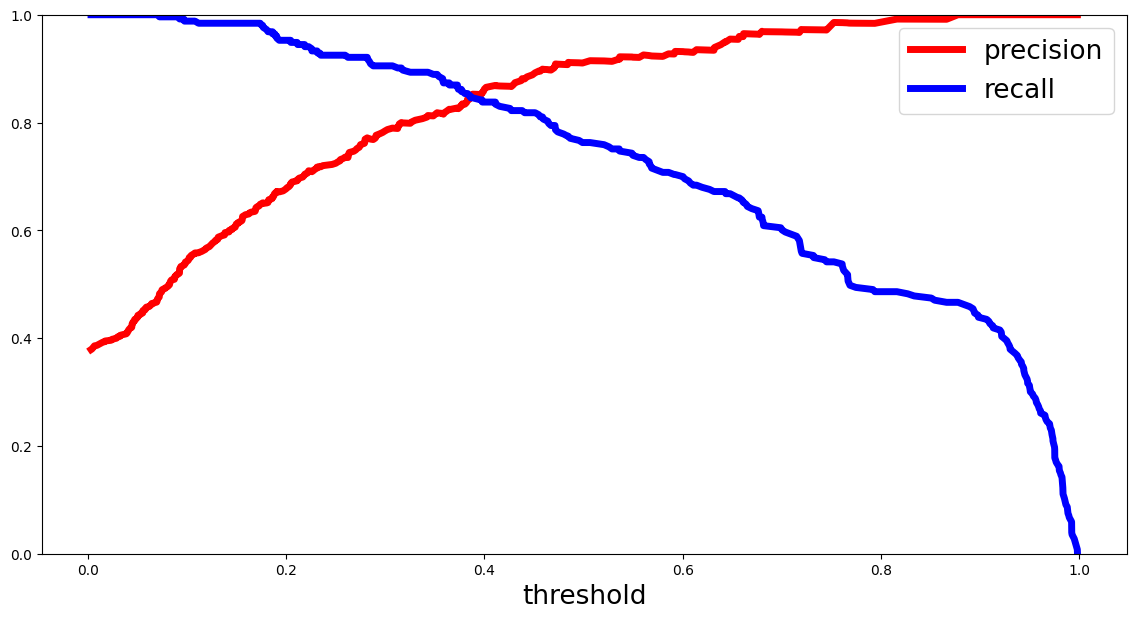

In [529]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rfc.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

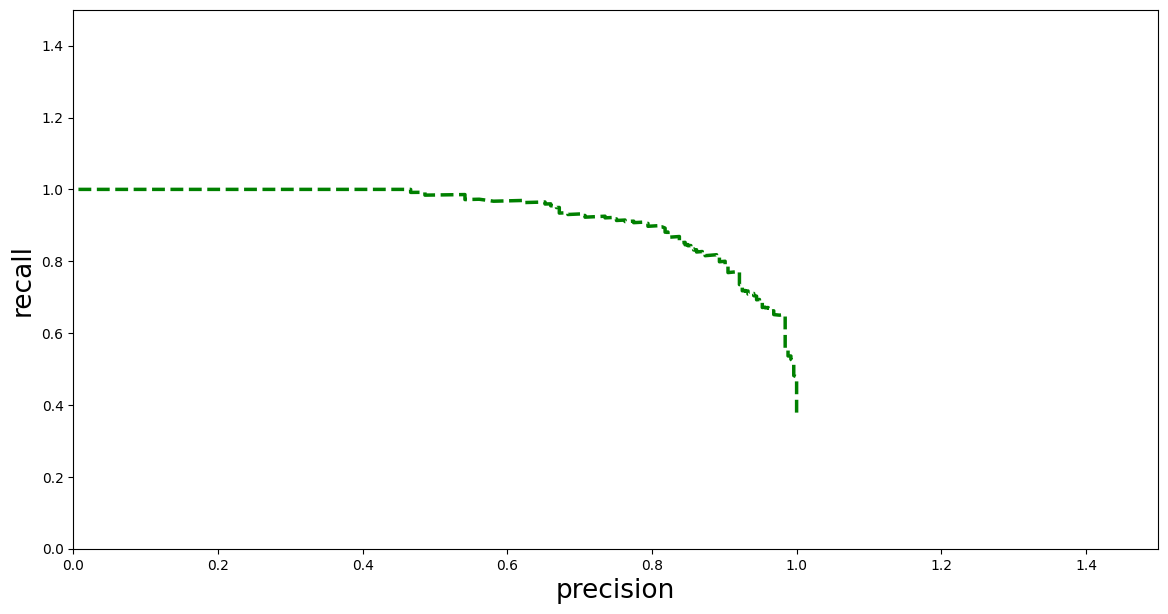

In [530]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

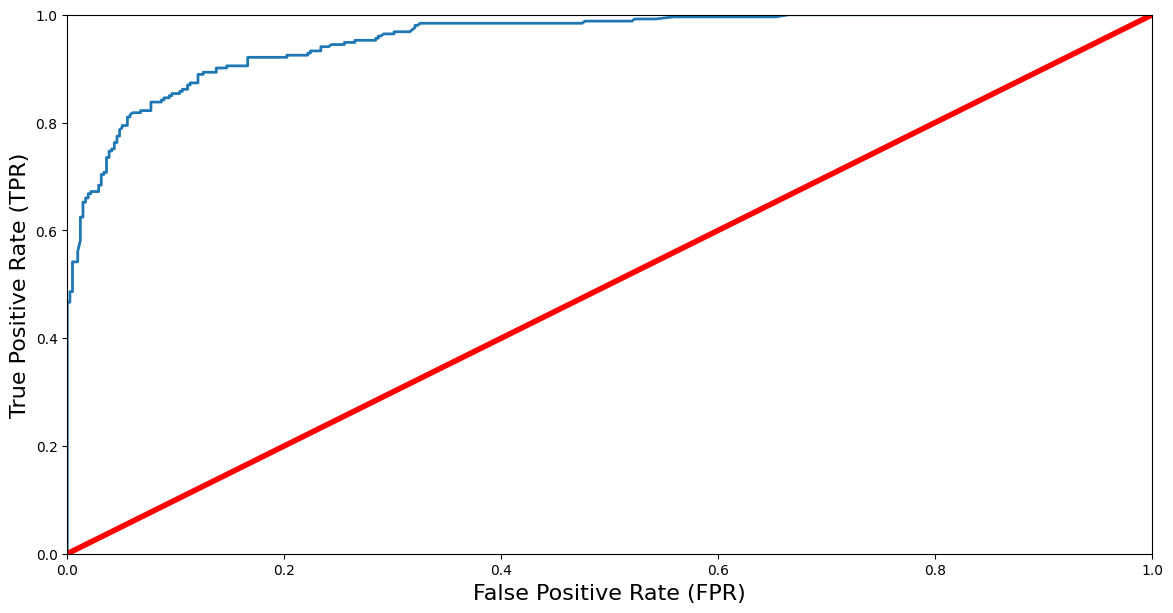

In [531]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)# plotting them against each other

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [532]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9543216343635411
